# 创建数据集
- 数据集的概念
- 数据结构
    - 向量
    - 矩阵
    - 数组
    - 数据框
        - attach()、detach()和with()
        - 实例标识符
    - 因子
    - 列表
- 数据的输入

## 数据集的概念
数据集通常是由数据构成的一个矩形数组，行表示观测，列表示变量。表2-1提供了一个假 想的病例数据集。

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-5/19343083.jpg)

1. 在R中，PatientID、AdmDate和Age为数值型变量，而Diabetes和Status则为字符型变量。
1. PatientID是实例标识符，AdmDate含有日期数据， Diabetes和Status分别是名义型和有序型变量。
1. R将实例标识符称为rownames(行名)，将类 别型(包括名义型和有序型)变量称为因子(factors)。

## 数据结构
### 向量
向量是用于存储数值型、字符型或逻辑型数据的一维数组。

In [1]:
a <- c(1, 2, 5, 3, 6, -2, 4)
b <- c("one", "two", "three")
c <- c(TRUE, TRUE, TRUE, FALSE, TRUE, FALSE)

In [2]:
a <- c("k", "j", "h", "a", "c", "m")
a[3]

[1] "h"

In [3]:
a[c(1, 3, 5)]

[1] "k" "h" "c"

In [4]:
a[2:6]

[1] "j" "h" "a" "c" "m"

### 矩阵
```r
myymatrix <- matrix(vector, nrow=number_of_rows, ncol=number_of_columns, byrow=logical_value, dimnames=list(
char_vector_rownames, char_vector_colnames))
```

vector包含了矩阵的元素，nrow和ncol用以指定行和列的维数，dimnames包含了可选的、以字符型向量表示的行名和列名。选项byrow则表明矩阵应当按行填充(byrow=TRUE) 还是按列填充(byrow=FALSE)，默认情况下按列填充。

代码清单2-1 创建矩阵

In [5]:
y <- matrix(1:20, nrow=5, ncol=4) # 创建一个5×4的矩阵
y

1,6,11,16
2,7,12,17
3,8,13,18
4,9,14,19
5,10,15,20


In [6]:
cells <- c(1,26,24,68)
rnames <- c("R1", "R2")
cnames <- c("C1", "C2")
mymatrix <- matrix(cells, nrow=2, ncol=2, byrow=TRUE, dimnames=list(rnames, cnames)) # 按行填充的2×2矩阵
mymatrix

,C1,C2
R1,1,26
R2,24,68


In [7]:
mymatrix <- matrix(cells, nrow=2, ncol=2, byrow=FALSE, dimnames=list(rnames, cnames)) # 按列填充的2×2矩阵
mymatrix

,C1,C2
R1,1,24
R2,26,68


代码清单2-2 矩阵下标的使用

In [8]:
x <- matrix(1:10, nrow=2)
x

1,3,5,7,9
2,4,6,8,10


In [9]:
x[2,]

[1]  2  4  6  8 10

In [10]:
x[,2]

[1] 3 4

In [11]:
x[1,4]

[1] 7

In [12]:
x[1, c(4,5)]

[1] 7 9

### 数组
```r
myarray <- array(vector, dimensions, dimnames)
```

vector包含了数组中的数据，dimensions是一个数值型向量，给出了各个维度下标的最大值，而dimnames是可选的、各维度名称标签的列表。

代码清单2-3 创建一个数组

In [13]:
dim1 <- c("A1", "A2")
dim2 <- c("B1", "B2", "B3")
dim3 <- c("C1", "C2", "C3", "C4")
z <- array(1:24, c(2, 3, 4), dimnames=list(dim1, dim2, dim3))
z

, , C1

   B1 B2 B3
A1  1  3  5
A2  2  4  6

, , C2

   B1 B2 B3
A1  7  9 11
A2  8 10 12

, , C3

   B1 B2 B3
A1 13 15 17
A2 14 16 18

, , C4

   B1 B2 B3
A1 19 21 23
A2 20 22 24

In [14]:
z[1,2,3]

[1] 15

### 数据框
```r
mydata <- data.frame(col1, col2, col3,...)
```

列向量col1、col2、col3等可为任何类型(如字符型、数值型或逻辑型)。每一列的名称可由函数names指定。

代码清单2-4 创建一个数据框

In [15]:
patientID <- c(1, 2, 3, 4)
age <- c(25, 34, 28, 52)
diabetes <- c("Type1", "Type2", "Type1", "Type1")
status <- c("Poor", "Improved", "Excellent", "Poor")
patientdata <- data.frame(patientID, age, diabetes, status)
patientdata

patientID,age,diabetes,status
1,25,Type1,Poor
2,34,Type2,Improved
3,28,Type1,Excellent
4,52,Type1,Poor


代码清单2-5 选取数据框中的元素

In [16]:
patientdata[1:2]

patientID,age
1,25
2,34
3,28
4,52


In [17]:
patientdata[c("diabetes", "status")]

diabetes,status
Type1,Poor
Type2,Improved
Type1,Excellent
Type1,Poor


In [18]:
patientdata$age # 表示patientdata数据框中的变量age

[1] 25 34 28 52

生成糖尿病类型变量diabetes和病情变量status的列联表:

In [19]:
table(patientdata$diabetes, patientdata$status)

       
        Excellent Improved Poor
  Type1         1        0    2
  Type2         0        1    0

#### 1. attach()、detach()和with()
函数attach()可将数据框添加到R的搜索路径中。

In [20]:
summary(mtcars$mpg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   15.43   19.20   20.09   22.80   33.90 

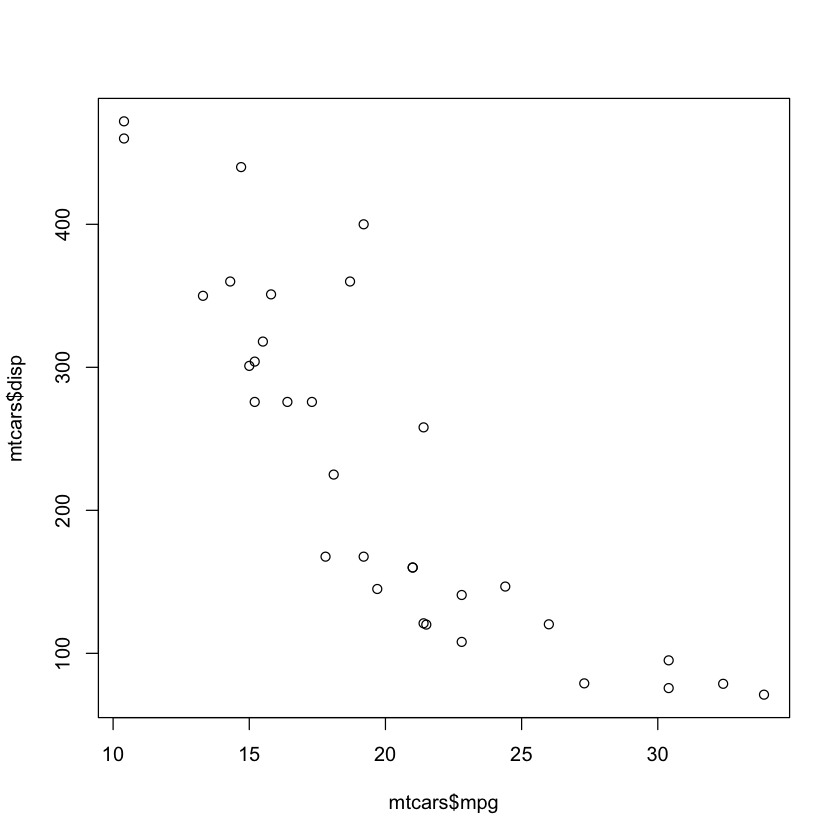

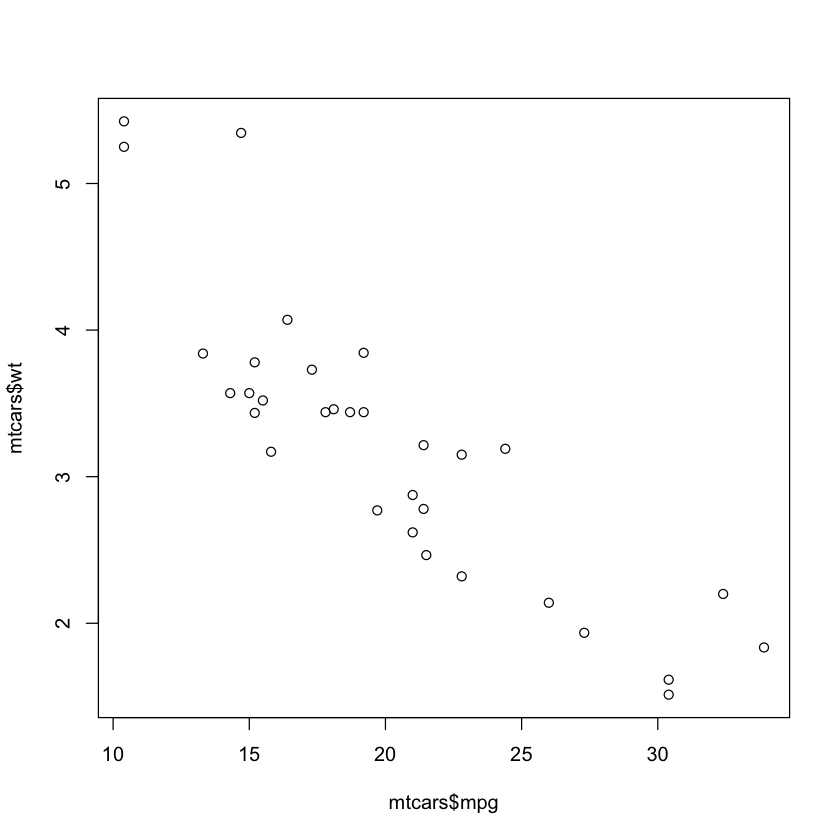

In [21]:
plot(mtcars$mpg, mtcars$disp)
plot(mtcars$mpg, mtcars$wt)

以上代码也可写成:
```r
attach(mtcars)
  summary(mpg)
  plot(mpg, disp)
  plot(mpg, wt)
detach(mtcars)
```

函数detach()将数据框从搜索路径中移除。

另一种方式是使用函数with()。可以这样重写上例:
```r
    with(mtcars, {
      print(summary(mpg))
      plot(mpg, disp)
      plot(mpg, wt)
})
```

在这种情况下，花括号{}之间的语句都针对数据框mtcars执行，这样就无需担心名称冲突了。函数with()的局限性在于，赋值仅在此函数的括号内生效。

```r
> with(mtcars, {
       stats <- summary(mpg)
       stats
      })
       Min. 1st Qu.  Median    Mean 3rd Qu.   Max.
      10.40   15.43   19.20   20.09   22.80  33.90
    > stats
Error: object 'stats' not found
```

#### 2. 实例标识符
在R中，实例标识 符(case identifier)可通过数据框操作函数中的rowname选项指定。

In [22]:
patientdata <- data.frame(patientID, age, diabetes, status, row.names=patientID)

### 因子
1. 名义型变量是没有顺序之分的类别变量。糖尿病类型Diabetes(Type1、Type2)是名义型变量的一例。
1. 有序型变量表示一种顺序关系，而非数量关系。病情Status(poor、improved、excellent)是顺序型变量的一个上佳示例。
1. 年龄Age就是一个连续型变量，它能够表示像14.5或22.8这样的值以及其间的其他任意值。

类别(名义型)变量和有序类别(有序型)变量在R中称为因子(factor)。函数factor()以一个整数向量的形式存储类别值，整数的取值范围是\[1...k\](其中k是名义型变量中唯一值的个数)。假设有向量:
```r
diabetes <- c("Type1", "Type2", "Type1", "Type1")
```

语句diabetes <- factor(diabetes)将此向量存储为(1, 2, 1, 1)，并在内部将其关联为 1=Type1和2=Type2(具体赋值根据字母顺序而定)。要表示有序型变量，需要为函数factor()指定参数ordered=TRUE。给定向量: 
```r
status <- c("Poor", "Improved", "Excellent", "Poor")
```

语句status <- factor(status, ordered=TRUE)会将向量编码为(3, 2, 1, 3)，并在内部将这些值关联为1=Excellent、2=Improved以及3=Poor。可以通过指定levels选项来覆盖默认排序。例如: 
```r
status <- factor(status, order=TRUE, levels=c("Poor", "Improved", "Excellent"))
```

数值型变量可以用levels和labels参数来编码成因子。如果男性被编码成1，女性被编码成2，则以下语句:
```r
sex <- factor(sex, levels=c(1, 2), labels=c("Male", "Female"))
```

代码清单2-6 因子的使用

In [23]:
patientID <- c(1, 2, 3, 4)
age <- c(25, 34, 28, 52)
diabetes <- c("Type1", "Type2", "Type1", "Type1")
status <- c("Poor", "Improved", "Excellent", "Poor")
diabetes <- factor(diabetes)
status <- factor(status, order=TRUE)
patientdata <- data.frame(patientID, age, diabetes, status)
str(patientdata) # 显示对象的结构

'data.frame':	4 obs. of  4 variables:
 $ patientID: num  1 2 3 4
 $ age      : num  25 34 28 52
 $ diabetes : Factor w/ 2 levels "Type1","Type2": 1 2 1 1
 $ status   : Ord.factor w/ 3 levels "Excellent"<"Improved"<..: 3 2 1 3


In [24]:
summary(patientdata) # 显示对象的统计概要

   patientID         age         diabetes       status 
 Min.   :1.00   Min.   :25.00   Type1:3   Excellent:1  
 1st Qu.:1.75   1st Qu.:27.25   Type2:1   Improved :1  
 Median :2.50   Median :31.00             Poor     :2  
 Mean   :2.50   Mean   :34.75                          
 3rd Qu.:3.25   3rd Qu.:38.50                          
 Max.   :4.00   Max.   :52.00                          

### 列表
可以使用函数list()创建列表:
```r
mylist <- list(object1, object2, ...) 
```

其中的对象可以是目前为止讲到的任何结构。你还可以为列表中的对象命名:

```r
mylist <- list(name1=object1, name2=object2, ...) 
```

代码清单2-7展示了一个例子。

In [27]:
g <- "My First List"
h <- c(25, 26, 18, 39)
j <- matrix(1:10, nrow=5)
k <- c("one", "two", "three")
mylist <- list(title=g, ages=h, data=j, seq=k)
mylist

1,6
2,7
3,8
4,9
5,10


## 数据的输入
### 从带分隔符的文本文件导入数据
```r
mydataframe <- read.table(file, options)
```

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-5/24017519.jpg)

### 访问数据库管理系统

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-5/18373575.jpg)

```r
# install.packages("RODBC")

library(RODBC)
myconn <-odbcConnect("mydsn", uid="Rob", pwd="aardvark")
crimedat <- sqlFetch(myconn, Crime)
pundat <- sqlQuery(myconn, "select * from Punishment")
close(myconn)
```

## 处理数据对象的实用函数
表2-4 处理数据对象的实用函数

| 函数 | 用途 |
| -- | -- |
| length(object) | 显示对象中元素/成分的数量 |
| dim(object) | 显示某个对象的维度 |
| str(object) | 显示某个对象的结构 |
| class(object) | 显示某个对象的类或类型 |
| mode(object) | 显示某个对象的模式 |
| names(object) | 显示某对象中各成分的名称 |
| c(object, object,...) | 将对象合并入一个向量 |
| cbind(object, object, ...) | 按列合并对象 |
| rbind(object, object, ...) | 按行合并对象 |
| object | 输出某个对象 |
| head(object) | 列出某个对象的开始部分 |
| tail(object) | 列出某个对象的最后部分 |
| ls() | 显示当前的对象列表 |
| rm(object, object, ...) | 删除一个或更多个对象。语句 rm(list = ls())将删除当前工作环境中的几乎所有对象 |
| newobject <- edit(object) | 编辑对象并另存为 newobject |
| fix(object) | 直接编辑对象 |